# Importando Dados

In [66]:
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [67]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics

In [68]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/iris.data", sep=',', header=None)
dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Renomeando as colunas do dataset

In [69]:
dataset.rename(columns={0: 'SepalaComprimento', 1: 'SepalaLargura', 2: 'PetalaComprimento', 3: 'PetalaLargura', 4: 'Especie'}, inplace=True)
dataset

,SepalaComprimento,SepalaLargura,PetalaComprimento,PetalaLargura,Especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SepalaComprimento  150 non-null    float64
 1   SepalaLargura      150 non-null    float64
 2   PetalaComprimento  150 non-null    float64
 3   PetalaLargura      150 non-null    float64
 4   Especie            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Criando amostra de treino e teste

In [87]:
train, test = train_test_split(dataset)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [88]:
train_X = train.loc[:, ["SepalaComprimento","SepalaLargura", "PetalaComprimento", "PetalaLargura"]]
train_Y = train["Especie"]
print(train_X)
print(train_Y)

     SepalaComprimento  SepalaLargura  PetalaComprimento  PetalaLargura
73                 6.1            2.8                4.7            1.2
109                7.2            3.6                6.1            2.5
12                 4.8            3.0                1.4            0.1
134                6.1            2.6                5.6            1.4
54                 6.5            2.8                4.6            1.5
..                 ...            ...                ...            ...
100                6.3            3.3                6.0            2.5
61                 5.9            3.0                4.2            1.5
92                 5.8            2.6                4.0            1.2
132                6.4            2.8                5.6            2.2
18                 5.7            3.8                1.7            0.3

[112 rows x 4 columns]
73     Iris-versicolor
109     Iris-virginica
12         Iris-setosa
134     Iris-virginica
54     Iris-versicol

In [89]:
test_X = test.loc[:, ["SepalaComprimento","SepalaLargura", "PetalaComprimento", "PetalaLargura"]]
test_Y = test["Especie"]

print(test_X)
print(test_Y)

     SepalaComprimento  SepalaLargura  PetalaComprimento  PetalaLargura
7                  5.0            3.4                1.5            0.2
24                 4.8            3.4                1.9            0.2
143                6.8            3.2                5.9            2.3
104                6.5            3.0                5.8            2.2
131                7.9            3.8                6.4            2.0
76                 6.8            2.8                4.8            1.4
22                 4.6            3.6                1.0            0.2
141                6.9            3.1                5.1            2.3
17                 5.1            3.5                1.4            0.3
35                 5.0            3.2                1.2            0.2
51                 6.4            3.2                4.5            1.5
125                7.2            3.2                6.0            1.8
135                7.7            3.0                6.1        

# Treinando o modelo

[Text(0.4, 0.9, 'X[2] <= 2.6\ngini = 0.665\nsamples = 112\nvalue = [37, 41, 34]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 5.05\ngini = 0.496\nsamples = 75\nvalue = [0, 41, 34]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3, 0.3, 'X[1] <= 2.9\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.5, 'X[0] <= 6.05\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.7, 0.3, 'X[0] <= 5.95\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

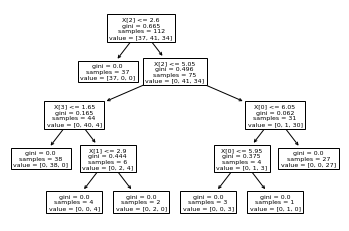

In [90]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(train_X, train_Y)

tree.plot_tree(decision_tree)

# Métricas

In [91]:
def printMetrics(pred_Y, real_Y):
  print('Acurácia da árvore de decisão: ',metrics.accuracy_score(real_Y, pred_Y))
  
  print('\nRecall da árvore de decisão: ',metrics.recall_score(real_Y, pred_Y, average='micro'))
  
  print('\nF-Score da árvore de decisão: ',metrics.f1_score(real_Y, pred_Y, average='micro'))
  
  print('\nMatriz de confusão:')
  print(metrics.confusion_matrix(real_Y, pred_Y))

## Avaliando o modelo com a amostra de teste

In [92]:
prediction = decision_tree.predict(test_X)

printMetrics(test_Y, prediction)

Acurácia da árvore de decisão:  0.9210526315789473

Recall da árvore de decisão:  0.9210526315789473

F-Score da árvore de decisão:  0.9210526315789473

Matriz de confusão:
[[13  0  0]
 [ 0  9  3]
 [ 0  0 13]]


## Avaliando o modelo com todos os dados do dataset

In [93]:
data_X = dataset.loc[:, ["SepalaComprimento","SepalaLargura", "PetalaComprimento", "PetalaLargura"]]
data_Y = dataset["Especie"]

print(data_X)
print(data_Y)

     SepalaComprimento  SepalaLargura  PetalaComprimento  PetalaLargura
0                  5.1            3.5                1.4            0.2
1                  4.9            3.0                1.4            0.2
2                  4.7            3.2                1.3            0.2
3                  4.6            3.1                1.5            0.2
4                  5.0            3.6                1.4            0.2
..                 ...            ...                ...            ...
145                6.7            3.0                5.2            2.3
146                6.3            2.5                5.0            1.9
147                6.5            3.0                5.2            2.0
148                6.2            3.4                5.4            2.3
149                5.9            3.0                5.1            1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
  

In [94]:
prediction = decision_tree.predict(data_X)

printMetrics(data_Y, prediction)

Acurácia da árvore de decisão:  0.98

Recall da árvore de decisão:  0.98

F-Score da árvore de decisão:  0.98

Matriz de confusão:
[[50  0  0]
 [ 0 50  3]
 [ 0  0 47]]
